In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.losses import sparse_categorical_crossentropy

model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\neils\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.8027 - loss: 5.6745
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.8956 - loss: 0.2882
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9073 - loss: 0.2506
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9107 - loss: 0.2361
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9181 - loss: 0.2218


In [5]:
metrics = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8882 - loss: 0.3389


In [6]:
metrics

[0.3338136374950409, 0.8899000287055969]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted: Shirt
Actual: Shirt
Correct Label Predicted


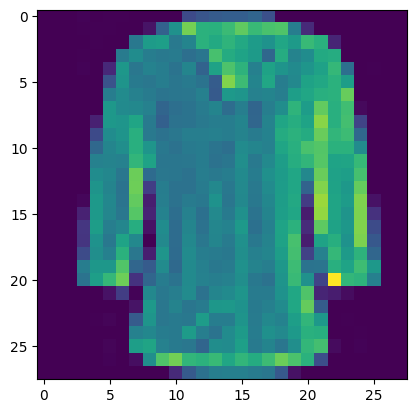

In [18]:
# Predicted Label
image_index = 4
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
prediction = model.predict(x_test[image_index:image_index+1])
predicted_label = np.argmax(prediction)
true_label = y_test[image_index]

print(f"Predicted: {class_names[predicted_label]}")
print(f"Actual: {class_names[true_label]}")

if np.argmax(prediction) == y_test[image_index]:
    print("Correct Label Predicted")
else:
    print("Incorrect Label Predicted")
plt.imshow(x_test[image_index:image_index+1][0])